In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest

In [2]:
df = pd.read_csv("After_dropping_corr_features2.csv")

In [3]:
# Isolate the features 
Features = ["Auto Loan", "Credit-Builder Loan", "Personal Loan", "Home Equity Loan", 
                "Mortgage Loan", "Student Loan", "Debt Consolidation Loan", "Payday Loan", 
                "Occupation_encoded", "Credit_Mix_encoded", "Payment_Behaviour_encoded", 
                "Customer_ID", "Month", "Age", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate","Num_of_Loan",
                "Delay_from_due_date", "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Credit_Utilization_Ratio",
                "Credit_History_Age", "Total_EMI_per_month", "Amount_invested_monthly", "Monthly_Balance"]

In [4]:
# Setting the features in a variable
X = df[Features]

In [5]:
# Initializing an IsolationForest model
isolation_forest = IsolationForest(contamination = 0.05)
# Fit the model
isolation_forest.fit(X)
# Predicting outliers
outliers = isolation_forest.predict(X)

In [6]:
# Create a new column to mark outliers (1 = not an outlier, -1 = an outlier)
df["IsOutlier"] = outliers

In [7]:
df.head()

,Customer_ID,Month,Age,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Personal Loan,Home Equity Loan,Mortgage Loan,Student Loan,Debt Consolidation Loan,Payday Loan,Credit_Mix_encoded,Payment_Behaviour_encoded,Credit_Score_encoded,IsOutlier
0,3392,1,23.0,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,1.0,1.0,0.0,0.0,0.0,0.0,1,2,0,1
1,3392,2,23.0,3.0,4.0,3.0,4.0,3.0,4.0,11.27,...,1.0,1.0,0.0,0.0,0.0,0.0,1,3,0,1
2,3392,3,23.0,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,1.0,1.0,0.0,0.0,0.0,0.0,1,4,0,1
3,3392,4,23.0,3.0,4.0,3.0,4.0,5.0,4.0,6.27,...,1.0,1.0,0.0,0.0,0.0,0.0,1,5,0,1
4,3392,5,23.0,3.0,4.0,3.0,4.0,6.0,4.0,11.27,...,1.0,1.0,0.0,0.0,0.0,0.0,1,1,0,1


In [8]:
# Sum of outliers
print("Number of outliers detected:", sum(outliers == -1))

Number of outliers detected: 5000


In [9]:
# Isolating non-outliers from the outliers in the dataframe
df_no_outliers = df[df["IsOutlier"] == 1].copy()

In [10]:
# Drop the IsOutlier column
df_no_outliers.drop("IsOutlier", axis = 1, inplace = True)

In [11]:
# Remaining rows
num_rows_no_outliers = df_no_outliers.shape[0]
print("Number of rows after removing outliers:", num_rows_no_outliers)

Number of rows after removing outliers: 95000


# Finding outliers using Z-score and plotting continuous features against the target feature (Credit_Score_encoded)

['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'] vs. Credit_Score_encoded


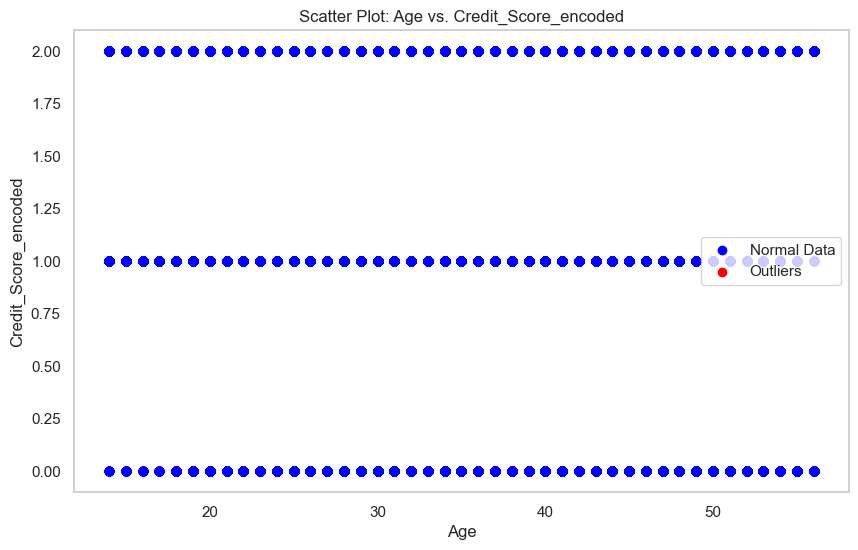

['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'] vs. Credit_Score_encoded


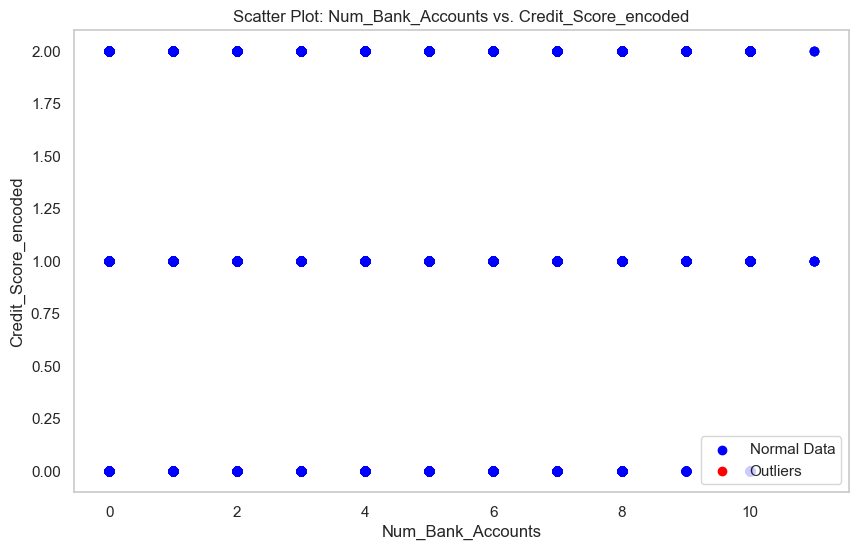

['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'] vs. Credit_Score_encoded


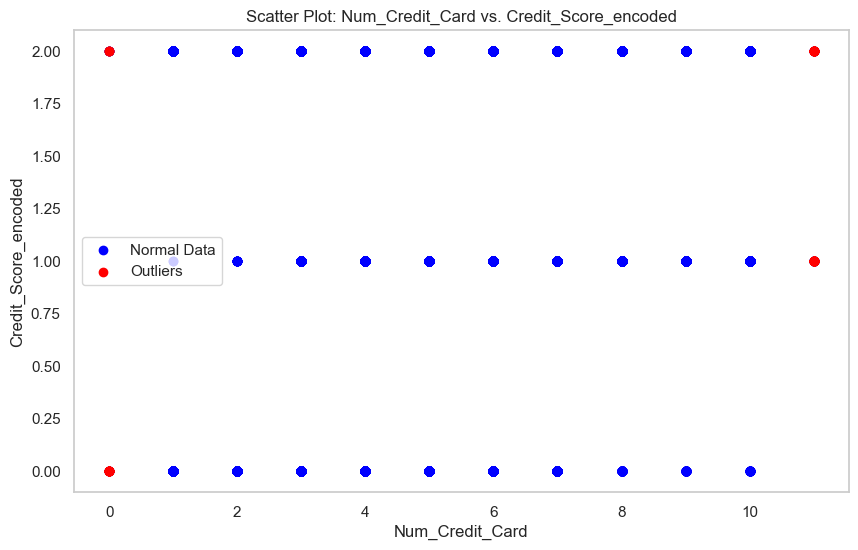

['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'] vs. Credit_Score_encoded


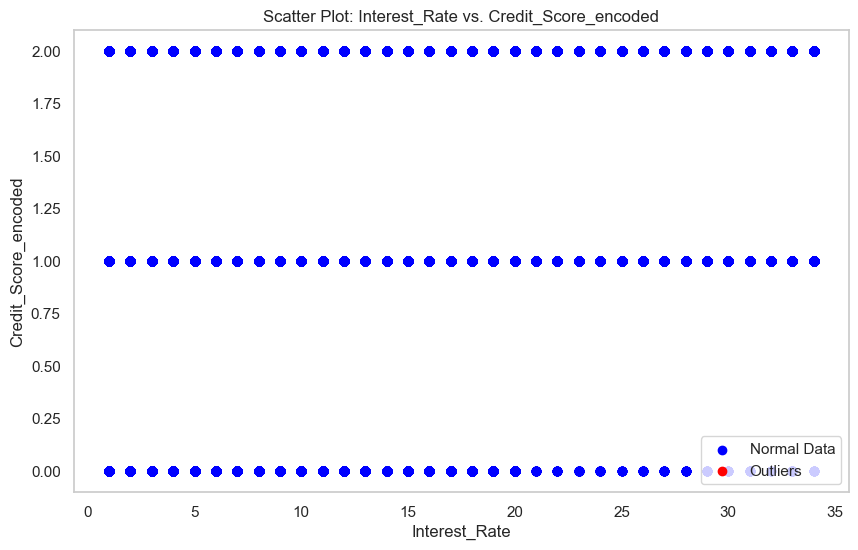

['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'] vs. Credit_Score_encoded


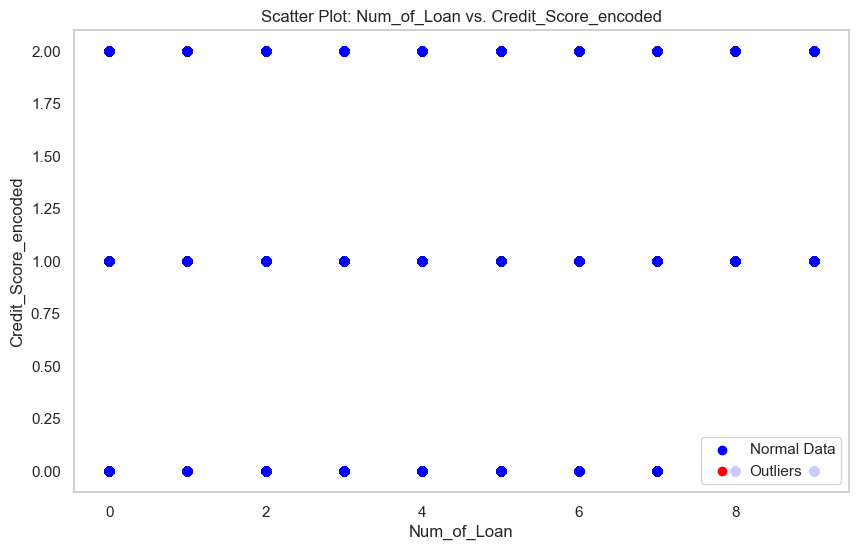

['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'] vs. Credit_Score_encoded


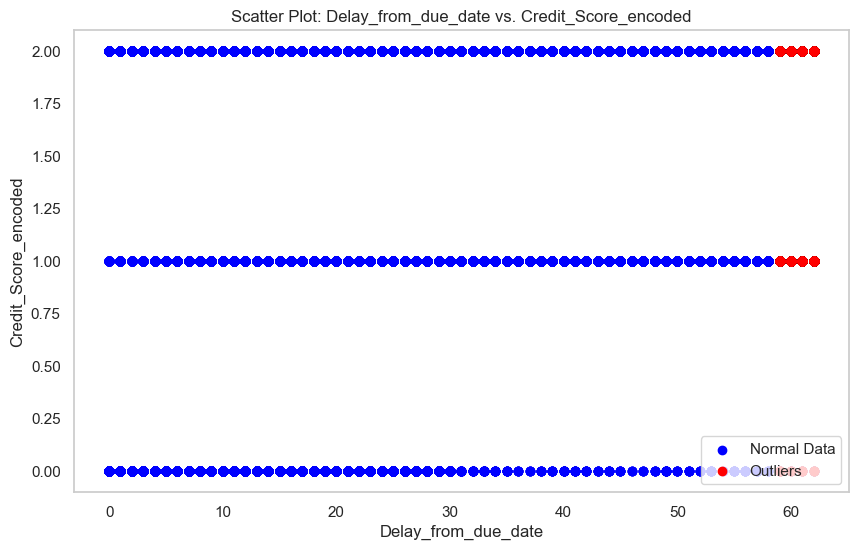

['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'] vs. Credit_Score_encoded


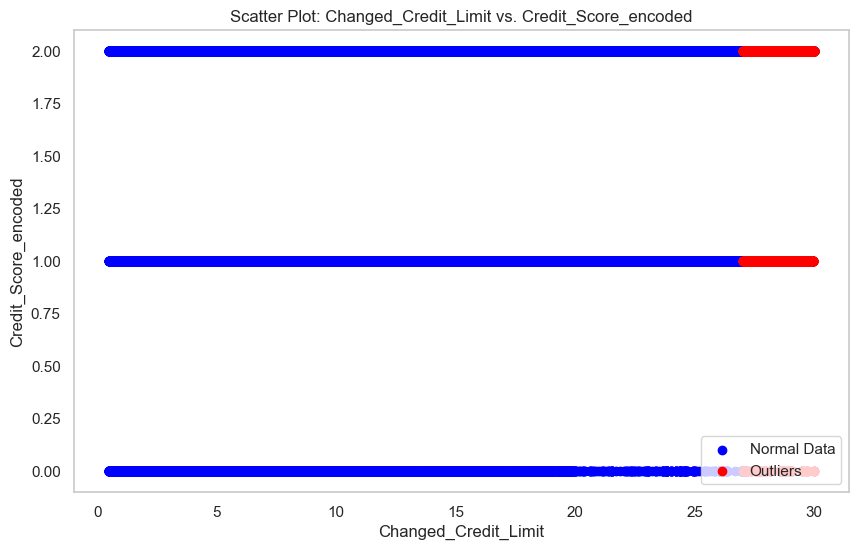

['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'] vs. Credit_Score_encoded


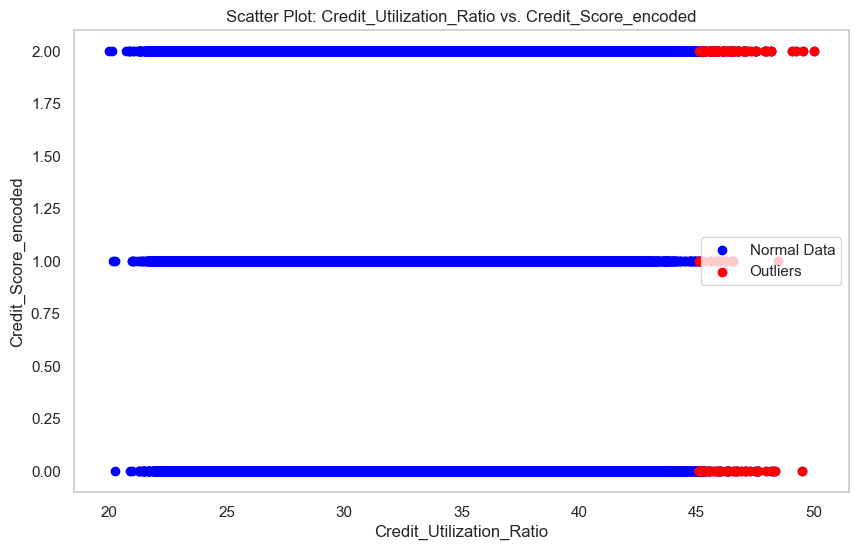

['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'] vs. Credit_Score_encoded


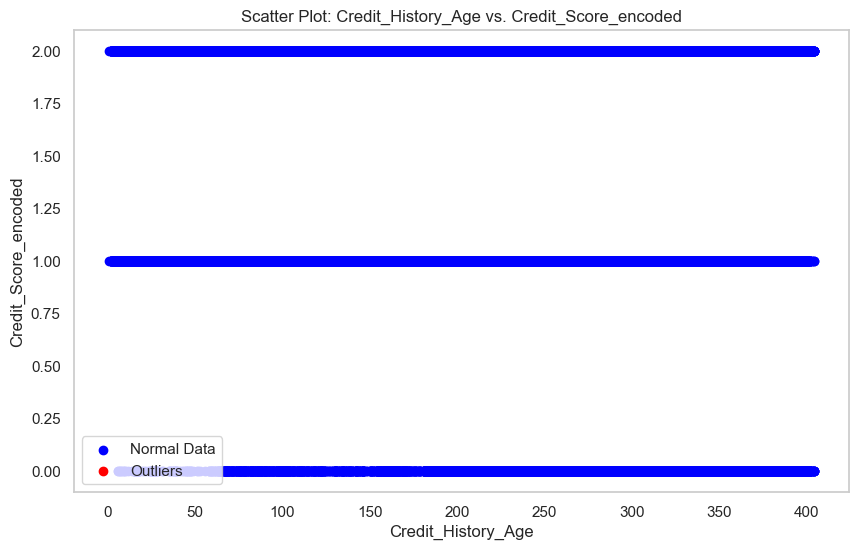

['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'] vs. Credit_Score_encoded


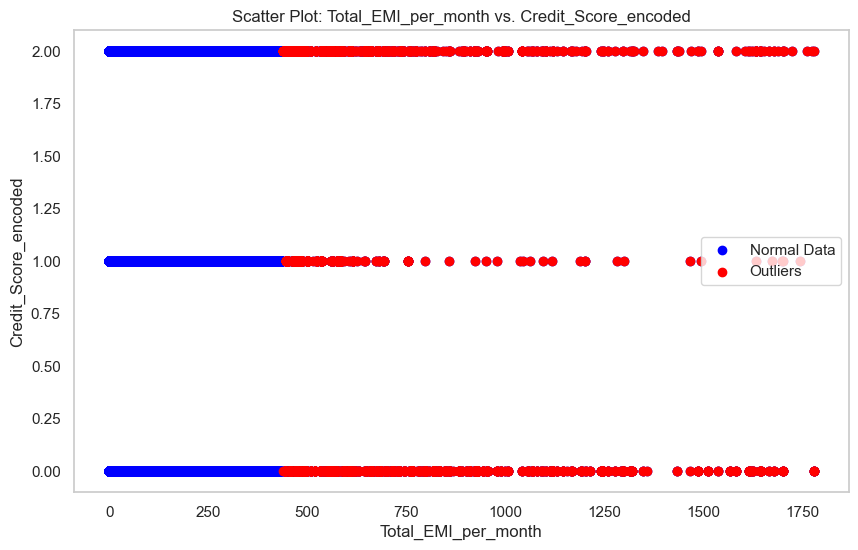

['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'] vs. Credit_Score_encoded


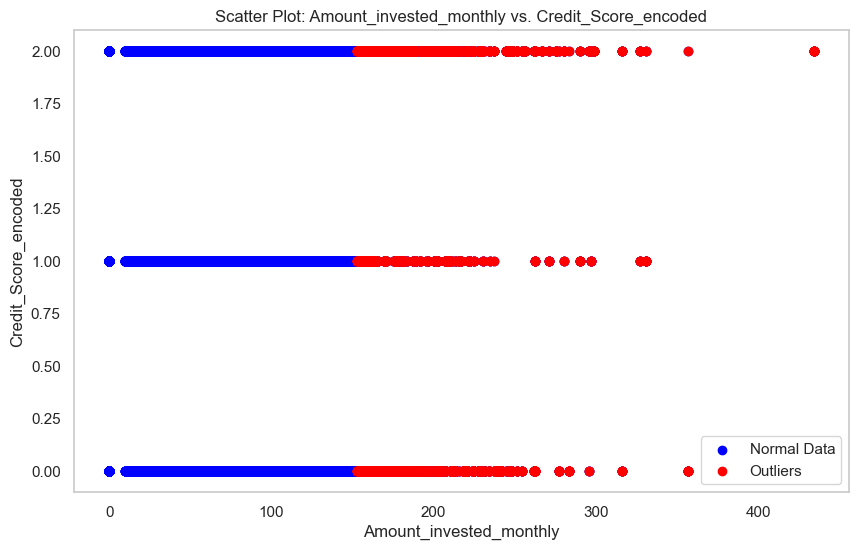

['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'] vs. Credit_Score_encoded


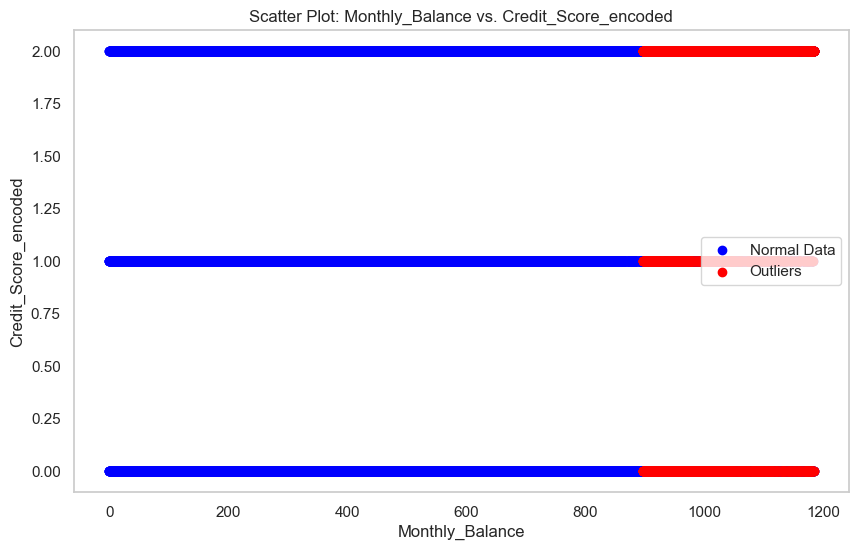

In [18]:
features_for_plot = ["Age", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate",
                     "Num_of_Loan", "Delay_from_due_date", "Changed_Credit_Limit",
                     "Credit_Utilization_Ratio", "Credit_History_Age", "Total_EMI_per_month",
                     "Amount_invested_monthly", "Monthly_Balance"]

credit_score_column = 'Credit_Score_encoded'

# Define a threshold for identifying outliers

outlier_threshold = 2.5

for column in features_for_plot:
  # Calculate the Z-scores
    z_scores_age = (df[column] - df[column].mean()) / df[column].std()
    z_scores_credit_score = (df[credit_score_column] - df[credit_score_column].mean()) / df[credit_score_column].std()

    # Identify outliers in both columns based on the threshold
    outliers_1 = z_scores_age.abs() > outlier_threshold
    outliers_credit_score = z_scores_credit_score.abs() > outlier_threshold
    print(f'{features_for_plot} vs. {credit_score_column}')

    # Create a scatter plot for outliers
    plt.figure(figsize=(10, 6))
    plt.scatter(df[column], df[credit_score_column], c='blue', label='Normal Data')
    plt.scatter(df[column][outliers_1], df[credit_score_column][outliers_1], c='red', label='Outliers')
    plt.xlabel(f'{column}')
    plt.ylabel(credit_score_column)
    plt.title(f'Scatter Plot: {column} vs. {credit_score_column}')
    plt.legend()
    plt.grid()
    plt.show()

# Isolation Forest on pre-modified data

In [79]:
dc = pd.read_csv("data_encoded.csv")

In [80]:
# Isolate the features 
Features_2 = ["Auto Loan", "Credit-Builder Loan", "Personal Loan", "Home Equity Loan", 
            "Mortgage Loan", "Student Loan", "Debt Consolidation Loan", "Payday Loan", 
            "Occupation_encoded", "Credit_Mix_encoded", "Payment_of_Min_Amount_encoded", 
            "Payment_Behaviour_encoded", "Customer_ID", "Month", "Age", "Annual_Income", 
            "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate",
            "Num_of_Loan", "Delay_from_due_date", "Num_of_Delayed_Payment", "Changed_Credit_Limit",
            "Num_Credit_Inquiries", "Outstanding_Debt", "Credit_Utilization_Ratio",
            "Credit_History_Age", "Total_EMI_per_month", "Amount_invested_monthly", "Monthly_Balance"]

In [81]:
# Setting the features in a variable
X_1 = dc[Features_2]

In [82]:
# Initializing an IsolationForest model
isolation_forest_1 = IsolationForest(contamination = 0.05)
# Fit the model
isolation_forest_1.fit(X_1)
# Predicting outliers
outliers_1 = isolation_forest_1.predict(X_1)

In [83]:
# Create a new column to mark outliers (1 = not an outlier, -1 = an outlier)
dc["IsOutlier"] = outliers_1

In [84]:
# Sum of outliers
print("Number of outliers detected:", sum(outliers_1 == -1))

Number of outliers detected: 5000


In [85]:
# Isolating non-outliers from the outliers in the dataframe
dc_no_outliers = dc[dc["IsOutlier"] == 1].copy()

In [86]:
# Drop the IsOutlier column
dc_no_outliers.drop("IsOutlier", axis = 1, inplace = True)

In [87]:
# Remaining rows
num_rows_no_outliers_1 = dc_no_outliers.shape[0]
print("Number of rows after removing outliers:", num_rows_no_outliers_1)

Number of rows after removing outliers: 95000
